# Regressão Iris

In [114]:
import numpy
import pandas
from sklearn import datasets
from matplotlib import pyplot
import seaborn
import statsmodels.formula.api as smf

In [115]:
iris_dict = datasets.load_iris()
iris = pandas.DataFrame.from_dict(iris_dict['data'])
iris.columns = iris_dict['feature_names']
iris['species'] = iris_dict['target']
iris['species'] = iris['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### PairPlot

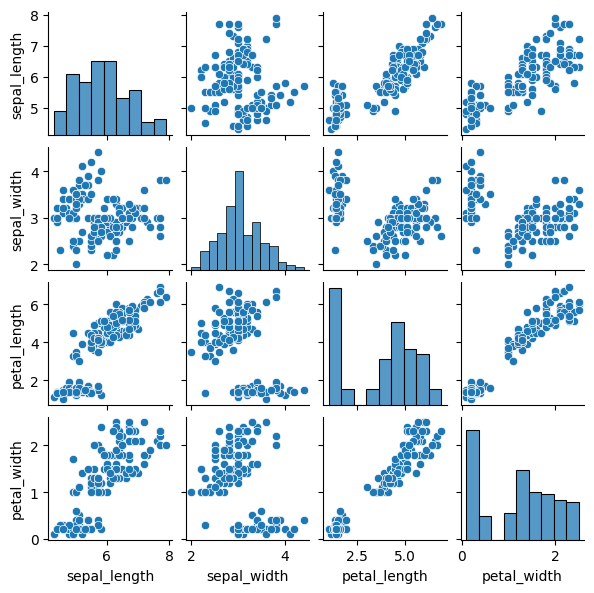

In [116]:
_ = seaborn.pairplot(iris, height=1.5)

# Regressão Iris

y = f(x) + e

In [117]:
y_col = 'petal_length' # sepal_length, sepal_width, petal_length, petal_width
x_col = 'petal_width' # sepal_length, sepal_width, petal_length, petal_width

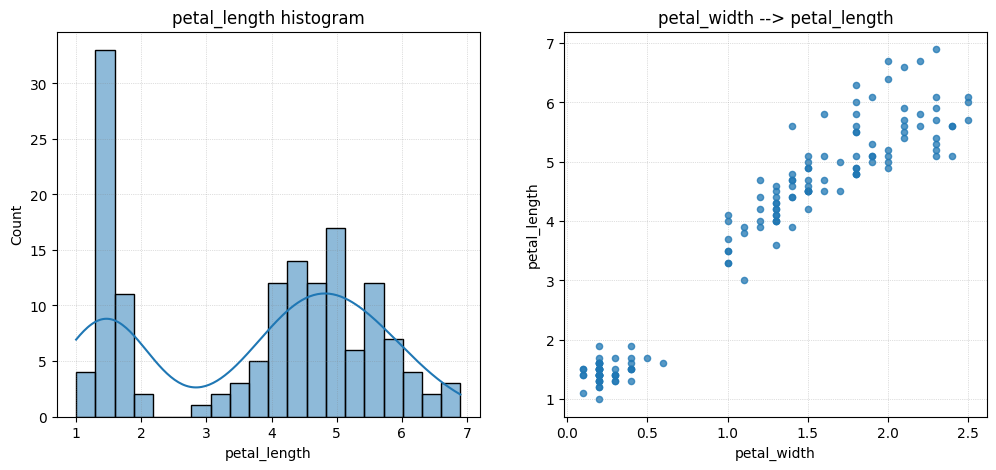

In [118]:
fig = pyplot.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)
_ = seaborn.histplot(data=iris, x=y_col, ax=ax1, kde=True, bins=20)
_ = ax1.set_title(f"{y_col} histogram")
_ = ax1.grid(which='both', axis='both', color='gray', linestyle=':', linewidth=0.5, alpha=0.5)
ax2 = fig.add_subplot(122)
_ = iris.plot(kind='scatter', x=x_col, y=y_col, ax=ax2, alpha=0.75)
_ = ax2.set_title(f"{x_col} --> {y_col}")
_ = ax2.grid(which='both', axis='both', color='gray', linestyle=':', linewidth=0.5, alpha=0.5)

### Stats Models - Regressão Linear

In [119]:
# formula = f'{y_col} ~ {x_col}' # R2 0.927
# formula = f'{y_col} ~ {x_col} + numpy.power({x_col}, 2)' # 0.947

# formula

In [ ]:
# formula = 'petal_length ~ petal_width + sepal_length + sepal_width'
formula = 'petal_length ~ petal_width + numpy.power(petal_width, 2) + sepal_length + sepal_width + species'

In [121]:
model = smf.ols(formula=formula, data=iris)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     1283.
Date:                Mon, 05 May 2025   Prob (F-statistic):          4.86e-112
Time:                        22:05:22   Log-Likelihood:                -28.024
No. Observations:                 150   AIC:                             66.05
Df Residuals:                     145   BIC:                             81.10
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [122]:
df_results = pandas.concat([results.params, results.bse], axis=1)
df_results.columns = ["alpha", "sigma"]
df_results = df_results.sort_values("alpha", ascending=False)
df_results

,alpha,sigma
petal_width,2.278276,0.181780
sepal_length,0.656040,0.056278
"numpy.power(petal_width, 2)",-0.310371,0.063664
sepal_width,-0.425877,0.078089
Intercept,-0.880263,0.304245


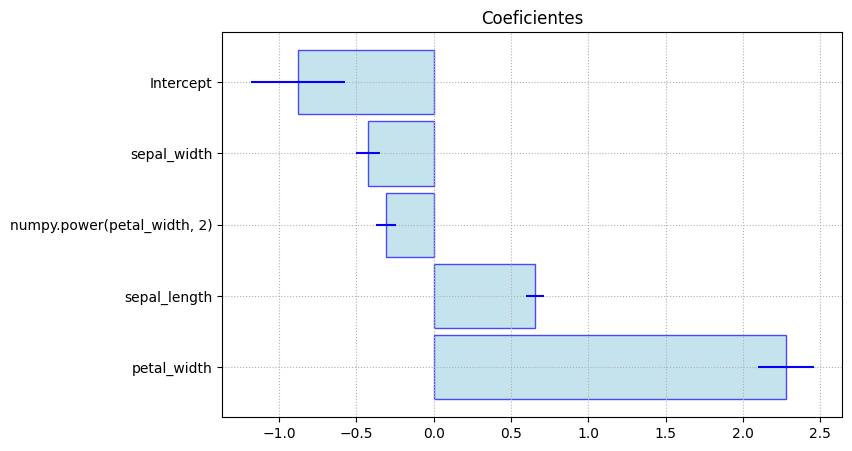

In [123]:
fig = pyplot.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
_ = df_results.alpha.plot.barh(width=0.9, ax=ax, color="lightblue", alpha=0.7, edgecolor="#0800ff")
_ = ax.errorbar(y=df_results.index.values, x=df_results.alpha.values,  xerr=df_results.sigma.values, ls='', color="#0800ff")
_ = ax.grid(ls=':')
_ = ax.set_title('Coeficientes')

In [124]:
analysis = iris.copy()
analysis['y_est'] = results.predict()
analysis['residual'] = analysis.y_est - analysis[y_col]
analysis['rn'] = (analysis['residual']-analysis['residual'].mean())/analysis['residual'].std()
analysis['rabs'] = analysis['residual'].abs()
analysis[analysis.species == 'versicolor'].head()

,sepal_length,sepal_width,petal_length,petal_width,species,y_est,residual,rn,rabs
50,7.0,3.2,4.7,1.4,versicolor,4.930471,0.230471,0.787522,0.230471
51,6.4,3.2,4.5,1.5,versicolor,4.674667,0.174667,0.596840,0.174667
52,6.9,3.1,4.9,1.5,versicolor,5.045275,0.145275,0.496406,0.145275
53,5.5,2.3,4.0,1.3,versicolor,4.185673,0.185673,0.634445,0.185673
54,6.5,2.8,4.6,1.5,versicolor,4.910622,0.310622,1.061398,0.310622


In [125]:
print(f" mean {analysis.residual.mean():.2f}, error 68% {analysis.residual.std():.2f}, error 95% {2*analysis.residual.std():.2f}, error 99% {3*analysis.residual.std():.2f}")

 mean -0.00, error 68% 0.29, error 95% 0.59, error 99% 0.88


In [126]:
eps = 0.1

if 'Intercept' in df_results.index:
    formula = f"{y_col} ~ " +''.join([f"{'+' if numpy.sign(alpha)> 0 else ' -'}{numpy.abs(alpha):.3f}*{var}" for var, (alpha, sigma) in df_results.iterrows() if var != 'Intercept']) + f" {'+' if numpy.sign(df_results.loc['Intercept', 'alpha'])> 0 else ' -'} {numpy.abs(df_results.loc['Intercept', 'alpha']):.3f}"
else:
    formula = f"{y_col} ~ " +''.join([f"{'+' if numpy.sign(alpha)> 0 else ' -'}{numpy.abs(alpha):.3f}*{var}" for var, (alpha, sigma) in df_results.iterrows()])

print(f"{formula} \u00B1 {analysis.residual.std():.3f}")

petal_length ~ +2.278*petal_width+0.656*sepal_length -0.310*numpy.power(petal_width, 2) -0.426*sepal_width  - 0.880 ± 0.293


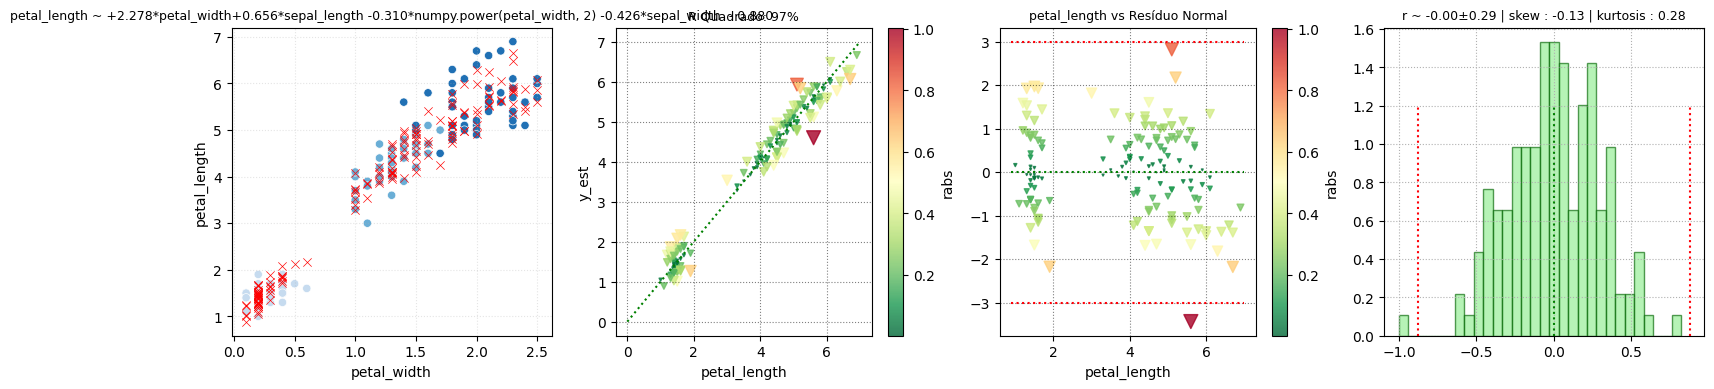

In [127]:
fig = pyplot.figure(figsize=(19, 4))

ax = fig.add_subplot(141)
_ = seaborn.scatterplot(y=y_col, x=x_col, hue='species', palette="Blues", data=analysis, ax=ax, legend=False, markers='o')
_ = seaborn.scatterplot(y='y_est', x=x_col, data=analysis, ax=ax, marker='x', color='red', legend=False)
ax.set_title(formula, size=9)
ax.grid(alpha=0.33, ls=':')

ax2 = fig.add_subplot(142)
_ = analysis.plot.scatter(x=y_col, y='y_est', c="rabs", s=100.0*analysis.rabs, cmap="RdYlGn_r", ax=ax2, marker='v', alpha=0.8)
_ = ax2.grid(ls=':', color="black", alpha=0.5)
_ = ax2.plot([0.0, analysis[y_col].max() + eps], [0.0, analysis[y_col].max() + eps], color="green", ls=":")
_ = ax2.set_title(f"R Quadrado: {100.0*results.rsquared:.0f}%", size=9)

ax1 = fig.add_subplot(143)
_ = analysis.plot.scatter(x=y_col, y="rn", c="rabs", s=100.0*analysis.rabs, cmap="RdYlGn_r", ax=ax1, marker='v', alpha=0.8)
_ = ax1.grid(ls=':', color="black", alpha=0.5)
_ = ax1.set_ylabel("")
_ = ax1.set_xlabel(y_col)
_ = ax1.set_yticks(numpy.arange(-6, 7, 1))
_ = ax1.set_title(f"{y_col} vs Resíduo Normal", size=9)
_ = ax1.plot([analysis[y_col].min() - eps, analysis[y_col].max() + eps], [0.0, 0.0], color="green", ls=":")
_ = ax1.plot([analysis[y_col].min() - eps, analysis[y_col].max() + eps], [3.0, 3.0], color="#ff0008", ls=":")
_ = ax1.plot([analysis[y_col].min() - eps, analysis[y_col].max() + eps], [-3.0, -3.0], color="#ff0008", ls=":")


ax = fig.add_subplot(144)
_ = ax.hist(analysis.residual, bins=30, color='lightgreen', edgecolor='darkgreen', alpha=0.65, density=True)
_ = ax.grid(ls=':')
_ = ax.plot([0.0, 0.0], [0.0, 1.2], color="green", ls=":")
_ = ax.plot([3.0*analysis.residual.std(), 3.0*analysis.residual.std()], [0.0, 1.2], color="#ff0008", ls=":")
_ = ax.plot([-3.0*analysis.residual.std(), -3.0*analysis.residual.std()], [0.0, 1.2], color="#ff0008", ls=":")
_ = ax.set_title(f"r ~ {analysis.residual.mean():.2f}\u00b1{analysis.residual.std():.2f} | skew : {analysis.residual.skew():.2f} | kurtosis : {analysis.residual.kurtosis():.2f}", size=9)